In [5]:
import numpy as np
import math
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from numpy import linalg as LA
import scipy.constants as sc

L=0
J=1/2
I=1/2
nj=2
ni=2
mJ=np.arange(-J,J+1,1,dtype=float)
mI=np.arange(-I,I+1,1,dtype=float)
##params
A=-9.9254535546e9; mB = 1.39962e6; gI=0.048
gJ = 1+(J*(J+1)+3/4-L*(L+1))/(2*J*(J+1))
def Mat(B):
    H = np.zeros((ni*nj,ni*nj),float)
    for i in range(ni):
        for j in range(nj):
            H[j+i*nj,j+i*nj]=A*mJ[j]*mI[i]+mB*(gJ*mJ[j]+(sc.m_e/sc.m_p)*gI*mI[i])*B
            if j > 0 and i < ni-1:
                H[j-1+(i+1)*nj,j+i*nj]= A*.5*math.sqrt((J-mJ[j]+1)*(J+mJ[j])*(I+mI[i]+1)*(I-mI[i]))
            if j < nj-1 and i > 0:
                H[j+1+(i-1)*nj,j+i*nj]= A*.5*math.sqrt((J+mJ[j]+1)*(J-mJ[j])*(I-mI[i]+1)*(I+mI[i]))
    return H

In [6]:
 
def column(matrix, i):
    return [row[i] for row in matrix]

def compute_dE(TE):  
    dE=np.zeros((num,n))
    dE2=np.zeros((num,n))
    for k in range(num-1):
        for i in range(n):
            dE[k][i] = (TE[k+1][i]-TE[k][i])/(bfact)   
    for k in range(num-1):
        for i in range(n):
            dE2[k][i] = (dE[k+1][i]-dE[k][i])/(bfact)
    return dE, dE2


def findright(step,ind,d1,E):
    min = 100000000
    tind =0 
    check = 0
    for i in range(n):
        tval = abs(((E[k+2][i]-E[k+1][ind])/bfact-d1[k][ind])/(bfact))
        if tval < min and abs(E[k+1][i]-E[k][ind]) :
            min = tval
            tind = i
    return tind
            
    
def replacecolumn(k,i,r):
    temp = np.copy(NE[k+2:num,i])
    NE[k+2:num,i] = NE[k+2:num,r]
    NE[k+2:num,r] = temp
    
n=nj*ni
num=100
bfact=.1
Bf=np.arange(0,num*bfact,bfact)
SE=np.zeros((num,n))
NE=np.zeros((num,n))
    
for i in range(num):
    w,v = eigh(Mat(i*bfact)) 
    SE[i]=w
    
NE=np.copy(SE) 



for k in range(2,num-2):
    d1,d2 = compute_dE(SE)
    for i in range(n):
        if abs(d2[k][i]) > 1e-6:
            r = findright(k,i,d1,NE)
            replacecolumn(k,i,r)
            d1,d2 = compute_dE(NE)

            
            
            

#####-----------------color coating grapher -------------------
# plt.rcParams['figure.figsize'] = [20, 12]
# plt.rcParams.update({'font.size': 30})
# fig = plt.figure()
# fig.suptitle('Zeeman Shift Including Hyperfine Interaction I='+str(I)+' J=' +str(J), fontsize=20)
# ax = fig.gca()
# ax.set_xlim([0,num*bfact])
# ax.patch.set_facecolor('lightgrey')
# ax.patch.set_alpha(.5)
# plt.xlabel("$B_{ext}$(Gauss)")
# plt.ylabel("Frequency (GHz)")
# nf=int(J+I-abs(J-I))+1
# color=plt.cm.rainbow(np.linspace(0,1,3*nf))
# for i,c in zip(range(nf),color):
#     nd=int(abs(J-I))
#     k=2*nd*i+i*(i+1)-i
#     l=k+(nd+i)*2+1
#     for j in range(k,l):
#         plt.plot(Bf,column(NE,j),c=c)
        
# plt.grid()
# plt.show()            

        
        
# plt.show()



zeeman 6.993257479779459
hyperfine -9925.4634225821


<Figure size 1440x864 with 0 Axes>

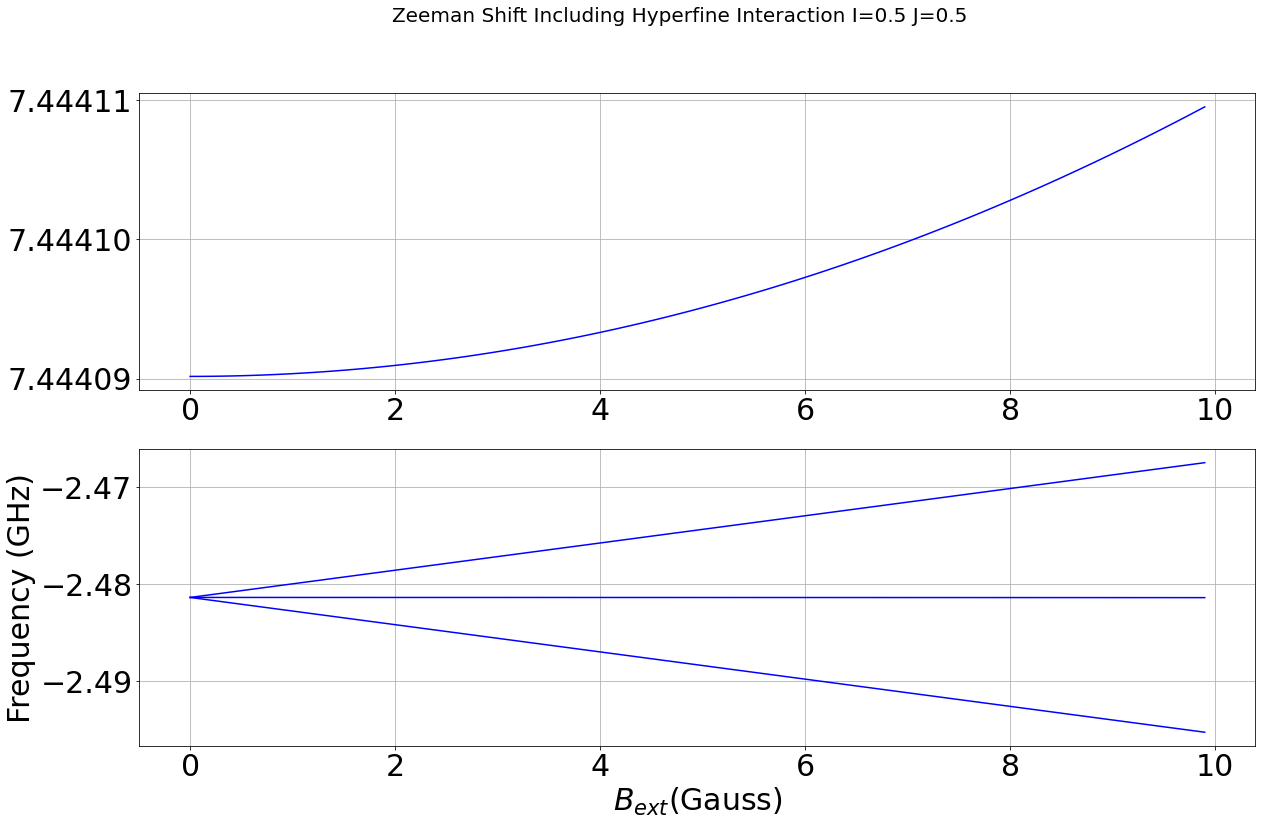

In [7]:

plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 30})
fig = plt.figure()
fig, ax = plt.subplots(2)
fig.suptitle('Zeeman Shift Including Hyperfine Interaction I='+str(I)+' J=' +str(J), fontsize=20)
# ax[1].set_ylim([column(NE/1e9,0)[num-1],column(NE/1e9,0)[num-1]])
# ax.patch.set_facecolor('lightgrey')
# ax.patch.set_alpha(.5)
plt.xlabel("$B_{ext}$(Gauss)")
plt.ylabel("Frequency (GHz)")

for j in range(0,3):
    ax[1].plot(Bf,column(NE/1e9,j),c='b')
    

print('zeeman', column(NE/1e6,1)[50]-column(NE/1e6,0)[50])
print('hyperfine',column(NE/1e6,1)[50]-column(NE/1e6,3)[50])

ax[0].plot(Bf,column(NE/1e9,3),c='b')
ax[0].grid() 
ax[1].grid()
plt.show()



In [8]:
for i,c in zip(range(nf),color):
    nd=int(abs(J-I))
    k=2*nd*i+i*(i+1)-i
    l=k+(nd+i)*2+1
    # for j in range(k,l):
        # plt.plot(Bf,column(NE,j),c=c)
        # print(Bf, column(NE,j)-column(NE,j)[0])
print(Bf[50],(column(NE,1)[50]-column(NE,3)[50]))
print(Bf[50],((column(NE,1)[50]-column(NE,3)[50])-(column(NE,1)[60]-column(NE,3)[60]))*1e6)


NameError: name 'nf' is not defined

In [ ]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 30})
fig = plt.figure()
fig.suptitle('Derivative of Zeeman Shift Including Hyperfine Interaction I='+str(I)+' J=' +str(J), fontsize=20)
ax = fig.gca()
ax.set_xlim([0,num*bfact])
ax.patch.set_facecolor('lightgrey')
ax.patch.set_alpha(.5)
plt.xlabel("$B_{ext}$(Gauss)")
plt.ylabel("Frequency (GHz)")
nf=int(J+I-abs(J-I))+1
color=plt.cm.rainbow(np.linspace(0,1,3*nf))
for i,c in zip(range(nf),color):
    nd=int(abs(J-I))
    k=2*nd*i+i*(i+1)-i
    l=k+(nd+i)*2+1
    for j in range(k,l):
        plt.plot(Bf[:-1],column(d1,j)[:-1],c=c)

plt.grid()
plt.show()            

        
        
plt.show()

In [ ]:
import numpy as np
import math
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from numpy import linalg as LA
L=2
J=5/2
I=1/2
nj=3
ni=2
mJ=np.arange(-J,J+1,1,dtype=float)
mI=np.arange(-I,I+1,1,dtype=float)
##params
A=89.7/3; mB =1.4; gI=.000154
gJ = 1+(J*(J+1)+3/4-L*(L+1))/(2*J*(J+1))
def Mat(B):
    H = np.zeros((ni*nj,ni*nj),float)
    for i in range(ni):
        for j in range(nj):
            H[j+i*nj,j+i*nj]=A*mJ[j]*mI[i]+mB*(gJ*mJ[j]+gI*mI[i])*B
            if j > 0 and i < ni-1:
                H[j-1+(i+1)*nj,j+i*nj]= A*.5*math.sqrt((J-mJ[j]+1)*(J+mJ[j])*(I+mI[i]+1)*(I-mI[i]))
            if j < nj-1 and i > 0:
                H[j+1+(i-1)*nj,j+i*nj]= A*.5*math.sqrt((J+mJ[j]+1)*(J-mJ[j])*(I-mI[i]+1)*(I+mI[i]))
    return H

Z1 = Mat(5.25)
n=nj*ni
ZE1=np.zeros(num)
w,v = eigh(Z1) 
ZE1=w
Z1b = Mat(0)
n=nj*ni
ZE1b=np.zeros(num)
w,v = eigh(Z1b) 
ZE1b=w

L=0
J=1/2
I=1/2
nj=2
ni=2
mJ=np.arange(-J,J+1,1,dtype=float)
mI=np.arange(-I,I+1,1,dtype=float)
##params
A=9925.4628; mB =1.4; gI=.00154
54
gJ = 1+(J*(J+1)+3/4-L*(L+1))/(2*J*(J+1))
def Mat(B):
    H = np.zeros((ni*nj,ni*nj),float)
    for i in range(ni):
        for j in range(nj):
            H[j+i*nj,j+i*nj]=A*mJ[j]*mI[i]+mB*(gJ*mJ[j]+gI*mI[i])*B
            if j > 0 and i < ni-1:
                H[j-1+(i+1)*nj,j+i*nj]= A*.5*math.sqrt((J-mJ[j]+1)*(J+mJ[j])*(I+mI[i]+1)*(I-mI[i]))
            if j < nj-1 and i > 0:
                H[j+1+(i-1)*nj,j+i*nj]= A*.5*math.sqrt((J+mJ[j]+1)*(J-mJ[j])*(I-mI[i]+1)*(I+mI[i]))
    return H


Z2=Mat(5.25)
n=nj*ni
ZE2=np.zeros(num) 
w,v = eigh(Z2) 
ZE2=w
Z2b=Mat(0)
n=nj*ni
ZE2b=np.zeros(num) 
w,v = eigh(Z2b) 
ZE2b=w    
    
    
print(ZE1-ZE1b)
print(ZE2-ZE2b)
print((ZE1-ZE1b)[9]-(ZE2-ZE2b)[3])

In [ ]:
import numpy as np
import math
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from numpy import linalg as LA
L=0
J=1/2
I=7/2
nj=2
ni=8
mJ=np.arange(-J,J+1,1,dtype=float)
mI=np.arange(-I,I+1,1,dtype=float)
##params
A= 10e9/4; mB = 1.4e6; gI= 5.6
gJ = 1+(J*(J+1)+3/4-L*(L+1))/(2*J*(J+1))
def Mat(B):
    H = np.zeros((ni*nj,ni*nj),float)
    for i in range(ni):
        for j in range(nj):
            H[j+i*nj,j+i*nj]=A*mJ[j]*mI[i]+mB*(gJ*mJ[j]+(sc.m_e/sc.m_p)*gI*mI[i])*B
            if j > 0 and i < ni-1:
                H[j-1+(i+1)*nj,j+i*nj]= A*.5*math.sqrt((J-mJ[j]+1)*(J+mJ[j])*(I+mI[i]+1)*(I-mI[i]))
            if j < nj-1 and i > 0:
                H[j+1+(i-1)*nj,j+i*nj]= A*.5*math.sqrt((J+mJ[j]+1)*(J-mJ[j])*(I-mI[i]+1)*(I+mI[i]))
    return H


 
def column(matrix, i):
    return [row[i] for row in matrix]

def compute_dE(TE):  
    dE=np.zeros((num,n))
    dE2=np.zeros((num,n))
    for k in range(num-1):
        for i in range(n):
            dE[k][i] = (TE[k+1][i]-TE[k][i])/(bfact)   
    for k in range(num-1):
        for i in range(n):
            dE2[k][i] = (dE[k+1][i]-dE[k][i])/(bfact)
    return dE, dE2


def findright(step,ind,d1,E):
    min = 100000000
    tind =0 
    check = 0
    for i in range(n):
        tval = abs(((E[k+2][i]-E[k+1][ind])/bfact-d1[k][ind])/(bfact))
        if tval < min and abs(E[k+1][i]-E[k][ind]) :
            min = tval
            tind = i
    return tind
            
    
def replacecolumn(k,i,r):
    temp = np.copy(NE[k+2:num,i])
    NE[k+2:num,i] = NE[k+2:num,r]
    NE[k+2:num,r] = temp
    
n=nj*ni
num=100
bfact=100
Bf=np.arange(0,num*bfact,bfact)
SE=np.zeros((num,n))
NE=np.zeros((num,n))
    
for i in range(num):
    w,v = eigh(Mat(i*bfact)) 
    SE[i]=w
    
NE=np.copy(SE) 



for k in range(2,num-2):
    d1,d2 = compute_dE(SE)
    for i in range(n):
        if abs(d2[k][i]) > 1e-6:
            r = findright(k,i,d1,NE)
            replacecolumn(k,i,r)
            d1,d2 = compute_dE(NE)

plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 30})
fig = plt.figure()
fig.suptitle('Cesium Ground State Zeeman Shift Including Hyperfine Interaction I='+str(I)+' J=' +str(J), fontsize=20)
ax = fig.gca()
ax.set_xlim([0,num*bfact])
ax.patch.set_facecolor('lightgrey')
ax.patch.set_alpha(.5)
plt.xlabel("$B_{ext}$(Gauss)")
plt.ylabel("Frequency (GHz)")
nf=int(J+I-abs(J-I))+1
color=plt.cm.rainbow(np.linspace(0,1,3*nf))
for i,c in zip(range(nf),color):
    nd=int(abs(J-I))
    k=2*nd*i+i*(i+1)-i
    l=k+(nd+i)*2+1
    for j in range(k,l):
        plt.plot(Bf,column(NE/1e9,j),c=c)

plt.grid()
plt.show()            

        
        
plt.show()


In [ ]:
import numpy as np
import math
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from numpy import linalg as LA
L=1
J=3/2
I=7/2
nj=4
ni=8
mJ=np.arange(-J,J+1,1,dtype=float)
mI=np.arange(-I,I+1,1,dtype=float)
##params
A= 1e9/8; mB = 1.4e6; gI= 5.6
gJ = 1+(J*(J+1)+3/4-L*(L+1))/(2*J*(J+1))
def Mat(B):
    H = np.zeros((ni*nj,ni*nj),float)
    for i in range(ni):
        for j in range(nj):
            H[j+i*nj,j+i*nj]=A*mJ[j]*mI[i]+mB*(gJ*mJ[j]+(sc.m_e/sc.m_p)*gI*mI[i])*B
            if j > 0 and i < ni-1:
                H[j-1+(i+1)*nj,j+i*nj]= A*.5*math.sqrt((J-mJ[j]+1)*(J+mJ[j])*(I+mI[i]+1)*(I-mI[i]))
            if j < nj-1 and i > 0:
                H[j+1+(i-1)*nj,j+i*nj]= A*.5*math.sqrt((J+mJ[j]+1)*(J-mJ[j])*(I-mI[i]+1)*(I+mI[i]))
    return H


 
def column(matrix, i):
    return [row[i] for row in matrix]

def compute_dE(TE):  
    dE=np.zeros((num,n))
    dE2=np.zeros((num,n))
    for k in range(num-1):
        for i in range(n):
            dE[k][i] = (TE[k+1][i]-TE[k][i])/(bfact)   
    for k in range(num-1):
        for i in range(n):
            dE2[k][i] = (dE[k+1][i]-dE[k][i])/(bfact)
    return dE, dE2


def findright(step,ind,d1,E):
    min = 100000000
    tind =0 
    check = 0
    for i in range(n):
        tval = abs(((E[k+2][i]-E[k+1][ind])/bfact-d1[k][ind])/(bfact))
        if tval < min and abs(E[k+1][i]-E[k][ind]) :
            min = tval
            tind = i
    return tind
            
    
def replacecolumn(k,i,r):
    temp = np.copy(NE[k+2:num,i])
    NE[k+2:num,i] = NE[k+2:num,r]
    NE[k+2:num,r] = temp
    
n=nj*ni
num=50
bfact=10
Bf=np.arange(0,num*bfact,bfact)
SE=np.zeros((num,n))
NE=np.zeros((num,n))
    
for i in range(num):
    w,v = eigh(Mat(i*bfact)) 
    SE[i]=w
    
NE=np.copy(SE) 



for k in range(2,num-2):
    d1,d2 = compute_dE(SE)
    for i in range(n):
        if abs(d2[k][i]) > 1e-6:
            r = findright(k,i,d1,NE)
            replacecolumn(k,i,r)
            d1,d2 = compute_dE(NE)

plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 30})
fig = plt.figure()
fig.suptitle('Cesium P state Zeeman Shift Including Hyperfine Interaction I='+str(I)+' J=' +str(J), fontsize=20)
ax = fig.gca()
ax.set_xlim([0,num*bfact])
ax.patch.set_facecolor('lightgrey')
ax.patch.set_alpha(.5)
plt.xlabel("$B_{ext}$(Gauss)")
plt.ylabel("Frequency (MHz)")
nf=int(J+I-abs(J-I))+1
color=plt.cm.rainbow(np.linspace(0,1,3*nf))
for i,c in zip(range(nf),color):
    nd=int(abs(J-I))
    k=2*nd*i+i*(i+1)-i
    l=k+(nd+i)*2+1
    for j in range(k,l):
        plt.plot(Bf,column(NE/1e6,j),c=c)

plt.grid()
plt.show()            

        
        
plt.show()


IndexError: index 2 is out of bounds for axis 0 with size 2

<Figure size 1440x864 with 0 Axes>

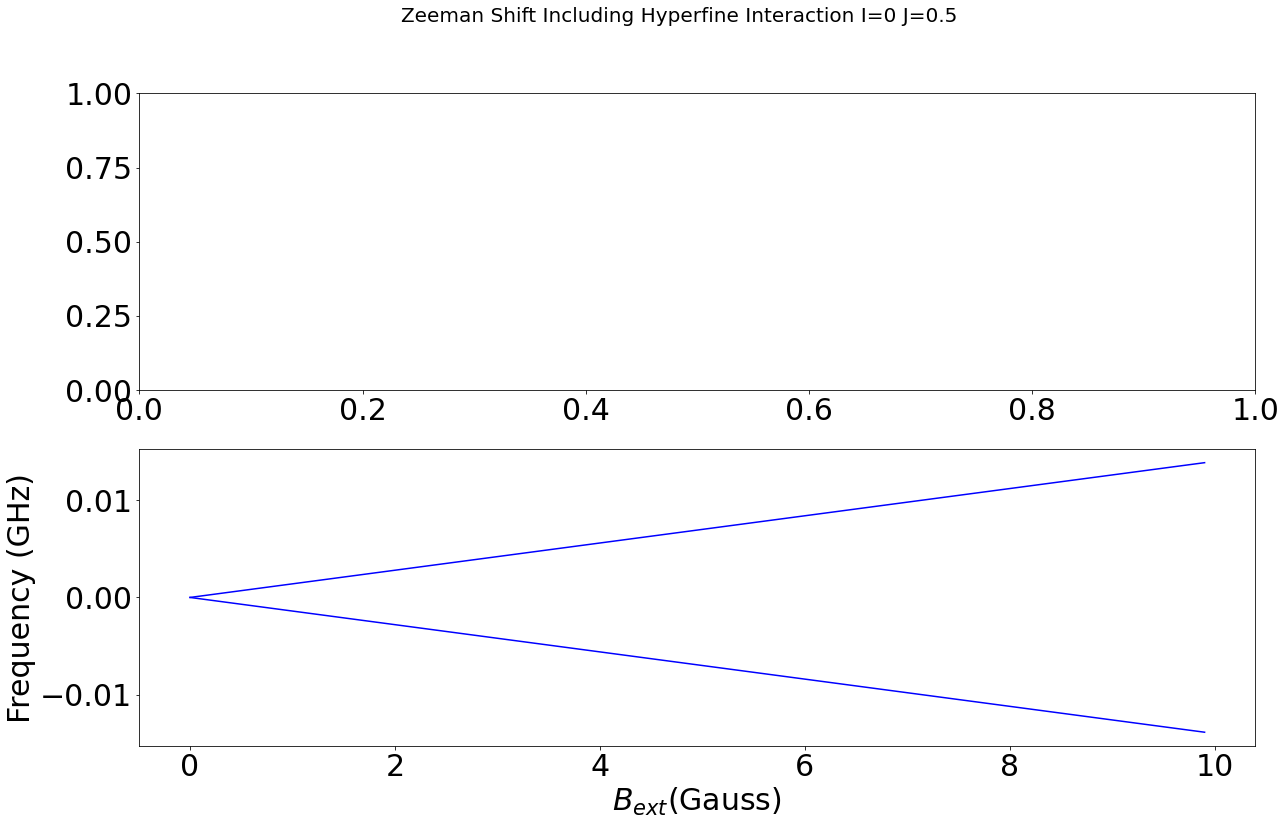

In [4]:
import numpy as np
import math
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from numpy import linalg as LA
L=0
J=1/2
I=1/2
nj=2
ni=2
mJ=np.arange(-J,J+1,1,dtype=float)
mI=np.arange(-I,I+1,1,dtype=float)
##params
A= -1.840e9; mB = 1.4e6; gI= .048
gJ = 1+(J*(J+1)+3/4-L*(L+1))/(2*J*(J+1))
def Mat(B):
    H = np.zeros((ni*nj,ni*nj),float)
    for i in range(ni):
        for j in range(nj):
            H[j+i*nj,j+i*nj]=A*mJ[j]*mI[i]+mB*(gJ*mJ[j]+(sc.m_e/sc.m_p)*gI*mI[i])*B
            if j > 0 and i < ni-1:
                H[j-1+(i+1)*nj,j+i*nj]= A*.5*math.sqrt((J-mJ[j]+1)*(J+mJ[j])*(I+mI[i]+1)*(I-mI[i]))
            if j < nj-1 and i > 0:
                H[j+1+(i-1)*nj,j+i*nj]= A*.5*math.sqrt((J+mJ[j]+1)*(J-mJ[j])*(I-mI[i]+1)*(I+mI[i]))
    return H


 
def column(matrix, i):
    return [row[i] for row in matrix]

def compute_dE(TE):  
    dE=np.zeros((num,n))
    dE2=np.zeros((num,n))
    for k in range(num-1):
        for i in range(n):
            dE[k][i] = (TE[k+1][i]-TE[k][i])/(bfact)   
    for k in range(num-1):
        for i in range(n):
            dE2[k][i] = (dE[k+1][i]-dE[k][i])/(bfact)
    return dE, dE2


def findright(step,ind,d1,E):
    min = 100000000
    tind =0 
    check = 0
    for i in range(n):
        tval = abs(((E[k+2][i]-E[k+1][ind])/bfact-d1[k][ind])/(bfact))
        if tval < min and abs(E[k+1][i]-E[k][ind]) :
            min = tval
            tind = i
    return tind
            
    
def replacecolumn(k,i,r):
    temp = np.copy(NE[k+2:num,i])
    NE[k+2:num,i] = NE[k+2:num,r]
    NE[k+2:num,r] = temp
    
n=nj*ni
num=100
bfact=.1
Bf=np.arange(0,num*bfact,bfact)
SE=np.zeros((num,n))
NE=np.zeros((num,n))
    
for i in range(num):
    w,v = eigh(Mat(i*bfact)) 
    SE[i]=w
    
NE=np.copy(SE) 



for k in range(2,num-2):
    d1,d2 = compute_dE(SE)
    for i in range(n):
        if abs(d2[k][i]) > 1e-6:
            r = findright(k,i,d1,NE)
            replacecolumn(k,i,r)
            d1,d2 = compute_dE(NE)


plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 30})
fig = plt.figure()
fig, ax = plt.subplots(2)
fig.suptitle('Zeeman Shift Including Hyperfine Interaction I='+str(I)+' J=' +str(J), fontsize=20)
# ax[1].set_ylim([column(NE/1e9,0)[num-1],column(NE/1e9,0)[num-1]])
# ax.patch.set_facecolor('lightgrey')
# ax.patch.set_alpha(.5)
plt.xlabel("$B_{ext}$(Gauss)")
plt.ylabel("Frequency (GHz)")

for j in range(0,3):
    ax[1].plot(Bf,column(NE/1e9,j),c='b')
    

print('zeeman', column(NE/1e6,1)[50]-column(NE/1e6,0)[50])
print('hyperfine',column(NE/1e6,1)[50]-column(NE/1e6,3)[50])

ax[0].plot(Bf,column(NE/1e9,3),c='b')
ax[0].grid() 
ax[1].grid()
plt.show()


